In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()# we an see that we have some missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

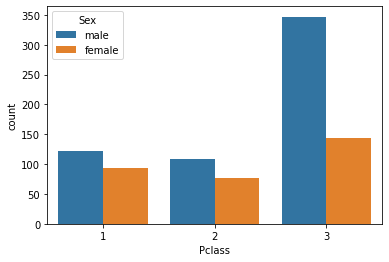

In [5]:
sns.countplot(x='Pclass',data=df,hue='Sex')

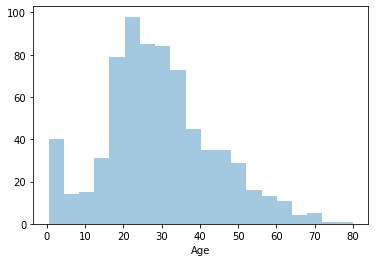

In [6]:
sns.distplot(df['Age'],kde=False)

In [7]:
df["Along"]=df['SibSp'] + df['Parch']
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [8]:
df['Along'].loc[df["Along"]>0]=1
df.tail()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


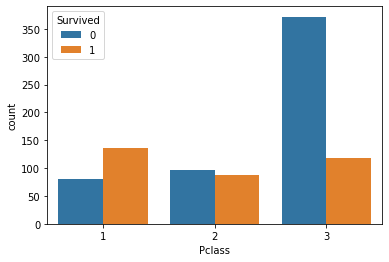

In [9]:
sns.countplot(x='Pclass',data=df,hue='Survived')

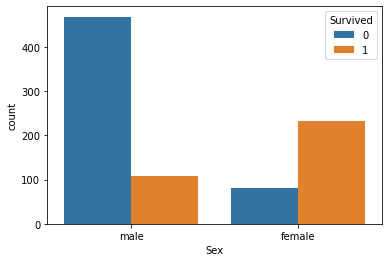

In [10]:
sns.countplot(x='Sex',data=df,hue='Survived')

# Data prep

In [11]:
df=df.drop(columns=["PassengerId",'Name','Cabin','Embarked'])

In [12]:
df=df.drop(columns=['Ticket'])

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,NaN,1,2,23.4500,1
889,1,1,male,26.0,0,0,30.0000,0


In [14]:
df['Sex']=np.where(df["Sex"]=='male',1,0)

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,NaN,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,0


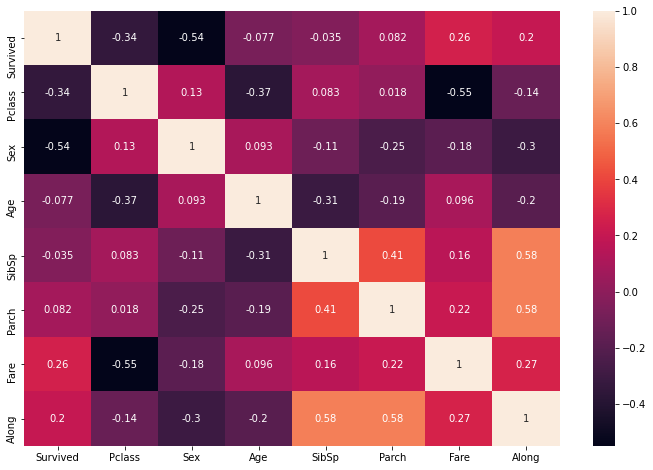

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# handling missing values

In [18]:
df.isnull(
).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Along         0
dtype: int64

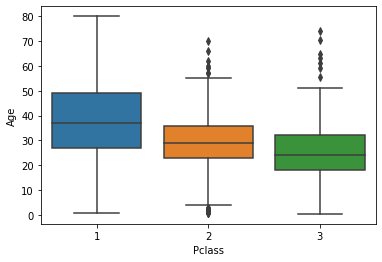

In [19]:
sns.boxplot(x='Pclass',y='Age',data=df
           )

In [22]:
print(df[df['Pclass']==1]["Age"].mean())
print(df[df['Pclass']==2]["Age"].mean())      #getting mean of all classes to fill the null values
print(df[df['Pclass']==3]["Age"].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [29]:
def fill_age(row):
    age=row[0]
    Pclass=row[1]
    if pd.isnull(age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.8776
        else :
            return 25.14
    else:
        return age
    

In [33]:
df["Age"]=df[["Age",'Pclass']].apply(fill_age,axis=1)

In [35]:
df.isnull().sum(
)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Along       0
dtype: int64

# Model building

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [57]:
y_pred=model.predict(xtest)

In [58]:
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))

0.8342696629213483
0.7988826815642458


In [59]:
from sklearn.metrics import classification_report,f1_score

In [60]:
print(classification_report(ytest,y_pred))
print(f1_score(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

0.7391304347826088


# visualizing the decision tree

In [61]:
from sklearn import tree

In [62]:
features=x.columns

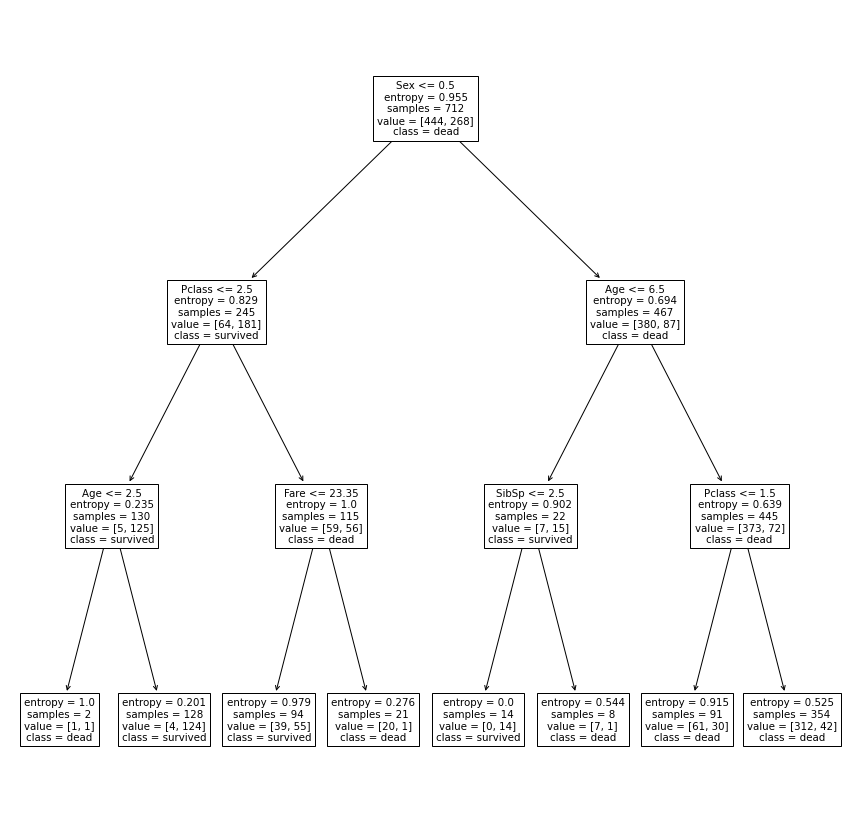

In [65]:
plt.figure(figsize=(15,15))
result=tree.plot_tree(model,feature_names=features,class_names=['dead','survived'])